In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\Robi Datathon\train.csv")

In [3]:
df.head()

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,M,Y,N,1,D,D,B,0,1,...,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,M,Y,Y,1,D,D,B,1,1,...,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,M,Y,Y,1,D,D,B,0,1,...,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2,0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,F,Y,Y,1,D,D,B,0,1,...,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4,0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,M,N,Y,1,B,D,D,1,l,...,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1,0


In [4]:
df.shape

(28322, 36)

In [7]:
df.dtypes

id         object
gender     object
s11        object
s12        object
s13         int64
s16        object
s17        object
s18        object
s48         int64
s52        object
s53        object
s54        object
s55        object
s56       float64
s57       float64
s58        object
s59       float64
s69        object
s70        object
s71        object
n1        float64
n2        float64
n3          int64
n4        float64
n5        float64
n6        float64
n7        float64
n8        float64
n9        float64
n10       float64
n11       float64
n12         int64
n13         int64
n14       float64
n15         int64
label       int64
dtype: object

In [8]:
df.isnull().sum()

id            0
gender        0
s11           0
s12           0
s13           0
s16           0
s17           0
s18           0
s48           0
s52           0
s53           0
s54       25694
s55       25116
s56       28322
s57       28322
s58           0
s59       28322
s69           0
s70           0
s71           0
n1            0
n2            0
n3            0
n4            0
n5            0
n6            0
n7            0
n8            0
n9            0
n10           0
n11           0
n12           0
n13           0
n14           0
n15           0
label         0
dtype: int64

# Handling Null Values from train set

<AxesSubplot:>

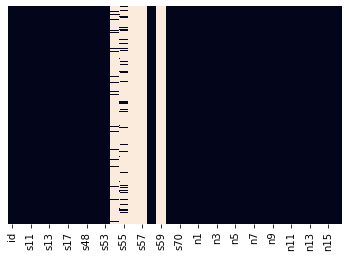

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)  

In [10]:
def drop_null(*xs):
    for x in xs: 
        if x in df.columns:
            print("No of null value in" ,x,':', sum(df[x].isnull()))
            df.drop([x],axis=1,inplace=True)
    

In [11]:
drop_null('s54','s55','s56','s57','s59')

No of null value in s54 : 25694
No of null value in s55 : 25116
No of null value in s56 : 28322
No of null value in s57 : 28322
No of null value in s59 : 28322


In [12]:
df['s53'].value_counts()

      25752
       2570
Name: s53, dtype: int64

In [13]:
#    S53 doesn't even have any value which can contribute to our model. Sowe dropped it##############

In [14]:
drop_null('s53')

No of null value in s53 : 0


In [15]:
df.columns

Index(['id', 'gender', 's11', 's12', 's13', 's16', 's17', 's18', 's48', 's52',
       's58', 's69', 's70', 's71', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7',
       'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'label'],
      dtype='object')

<AxesSubplot:>

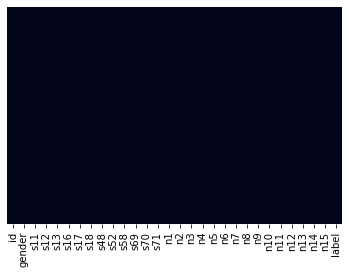

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)  #There is no null value in our training set now

# Handling Categorical variable by one hot encoding

In [17]:
def one_hot_encoding(*columns):
    global df
    for x in columns: 
        if x in df.columns:
            one_hot= pd.get_dummies(df[x], prefix=x)
            df=df.join(one_hot)
            df.drop([x], axis=1,inplace=True)

In [18]:
categorical_columns=[c for c,t in df.dtypes.to_dict().items() if t.str=='|O']      #Listing the categorical varibles(Id will be excluded)
categorical_columns

['id',
 'gender',
 's11',
 's12',
 's16',
 's17',
 's18',
 's52',
 's58',
 's69',
 's70',
 's71']

In [19]:
one_hot_encoding('gender','s11','s12','s16','s17','s18','s52','s58','s69','s70','s71')

In [20]:
df.head()

,id,s13,s48,n1,n2,n3,n4,n5,n6,n7,...,s69_x,s69_~1,s70_op: A,s70_op: B,s70_op: C,s70_op: D,s71_a,s71_b,s71_c,s71_d
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,1,0,16.144666,1.989441,2,2.318385,-32.839277,0.017176,-9.126056,...,1,0,0,0,0,1,0,1,0,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,1,1,7.144558,0.844866,3,6.197768,-32.576597,0.013857,-9.098287,...,1,0,0,0,0,1,0,1,0,0
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,1,0,6.923236,1.042018,6,7.824401,-32.510544,0.013943,-9.234894,...,1,0,0,0,0,1,0,1,0,0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,1,0,5.749840,0.781439,2,8.256767,-32.398679,0.010387,-9.378025,...,1,0,0,0,0,1,0,1,0,0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,1,1,14.771959,1.248188,3,2.300011,-32.396746,0.016289,-9.261962,...,0,1,0,0,0,1,0,0,0,1


# Handling Imbalace data

In [21]:
df['label'].value_counts()        # We have highly imbalaced data which need to taken care of"

0    23562
1     4760
Name: label, dtype: int64

Use SMOTE for upsampling

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
x=df.drop(['id','label'],axis=1)   #Features(Removing ID as it is unique for all rows)
y=df['label']

In [24]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(x, y)

y_sm.value_counts()

0    23562
1    23562
Name: label, dtype: int64

In [25]:
df_smote=X_sm.join(y_sm)

In [26]:
df_smote

,s13,s48,n1,n2,n3,n4,n5,n6,n7,n8,...,s69_~1,s70_op: A,s70_op: B,s70_op: C,s70_op: D,s71_a,s71_b,s71_c,s71_d,label
0,1,0,16.144666,1.989441,2,2.318385,-32.839277,0.017176,-9.126056,1.732291,...,0,0,0,0,1,0,1,0,0,0
1,1,1,7.144558,0.844866,3,6.197768,-32.576597,0.013857,-9.098287,1.505885,...,0,0,0,0,1,0,1,0,0,1
2,1,0,6.923236,1.042018,6,7.824401,-32.510544,0.013943,-9.234894,1.503828,...,0,0,0,0,1,0,1,0,0,0
3,1,0,5.749840,0.781439,2,8.256767,-32.398679,0.010387,-9.378025,1.485863,...,0,0,0,0,1,0,1,0,0,0
4,1,1,14.771959,1.248188,3,2.300011,-32.396746,0.016289,-9.261962,1.619210,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47119,1,1,16.134090,2.508036,2,2.688060,-32.362738,0.021888,-9.059848,1.970531,...,1,0,0,0,1,0,1,0,0,1
47120,1,0,11.982624,1.936055,1,7.720266,-32.398907,0.028084,-9.197888,1.981239,...,1,0,0,1,0,0,0,1,0,1
47121,1,0,10.508524,2.220934,7,7.800212,-33.050185,0.006620,-8.981937,1.907238,...,0,0,0,0,1,0,1,0,0,1
47122,1,1,13.108636,1.913104,7,6.121247,-32.928034,0.006047,-8.962397,1.886723,...,1,0,0,0,1,0,1,0,0,1


In [44]:
x=df_smote.drop(['label'],axis=1)   #Features(Removing ID as it is unique for all rows)
y=df_smote['label']

# Train test split for performance checking

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# Model Train

In [47]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [48]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.5,1] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [49]:
classifier=xgboost.XGBClassifier()

In [50]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [51]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=Non

In [52]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [53]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'colsample_bytree': 0.3}

In [54]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=5,
               monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)

In [55]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train, y_train,cv=5)

In [56]:
score.mean()

0.8780870050450302

ACCURACY OF THE MODEL:  0.9141644562334218
ROC OF THE MODEL:  0.9702839987145825

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      4753
           1       0.92      0.91      0.91      4672

    accuracy                           0.91      9425
   macro avg       0.91      0.91      0.91      9425
weighted avg       0.91      0.91      0.91      9425



C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


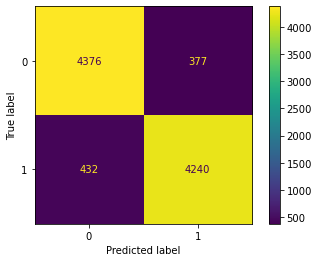

In [57]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
y_pred = random_search.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print("ROC OF THE MODEL: ",roc_auc_score(y_test, random_search.predict_proba(X_test)[:, 1]))
print()
print(classification_report(y_test, y_pred))

plot_confusion_matrix(random_search, X_test, y_test)

Random Forest

In [74]:
n_estimators = [100,150,220,250]
# Number of features to consider at every split
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [75]:
param_grid = {'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}
print(param_grid)

{'n_estimators': [100, 150, 220, 250], 'min_samples_split': [2, 5, 7], 'min_samples_leaf': [1, 2]}


In [76]:
from sklearn.ensemble import RandomForestClassifier
rf_Model = RandomForestClassifier()

In [79]:

rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 5, verbose=2, n_jobs = 4)

In [80]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 150, 220, 250]},
                   verbose=2)

In [81]:
rf_RandomGrid.best_params_

{'n_estimators': 220, 'min_samples_split': 2, 'min_samples_leaf': 1}

In [82]:
rf_RandomGrid.best_estimator_

RandomForestClassifier(n_estimators=220)

In [83]:
rf_classifier=RandomForestClassifier(bootstrap=False, max_depth=6, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5)

In [84]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf_classifier,X_train, y_train,cv=5)

In [85]:
score.mean()

0.8194647567397544

In [86]:
print (f'Train Accuracy - : {rf_RandomGrid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.921


ACCURACY OF THE MODEL:  0.9208488063660477
ROC OF THE MODEL:  0.9756612352256253

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4753
           1       0.92      0.92      0.92      4672

    accuracy                           0.92      9425
   macro avg       0.92      0.92      0.92      9425
weighted avg       0.92      0.92      0.92      9425



C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


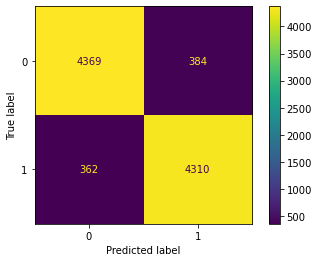

In [87]:
y_pred = rf_RandomGrid.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print("ROC OF THE MODEL: ",roc_auc_score(y_test, rf_RandomGrid.predict_proba(X_test)[:, 1]))
print()
print(classification_report(y_test, y_pred))

plot_confusion_matrix(rf_RandomGrid, X_test, y_test)

Logistic regression

In [88]:
from sklearn.linear_model import LogisticRegression

In [91]:
logModel = LogisticRegression()

In [92]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [93]:
logistic_RandomGrid = RandomizedSearchCV(estimator = logModel, param_distributions = param_grid, cv = 5, verbose=2, n_jobs = -1)

In [94]:
logistic_RandomGrid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py", line 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                         'max_iter': [100, 1000, 2500, 5000],
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none'],
                                         'solver': ['lbfgs', 'newton-cg',
                                                    'liblinear', 'sag',
                                                    'saga']}],
                   verbose=2)

In [95]:
logistic_RandomGrid.best_params_

{'solver': 'newton-cg',
 'penalty': 'none',
 'max_iter': 5000,
 'C': 206.913808111479}

In [96]:
logistic_RandomGrid.best_estimator_

LogisticRegression(C=206.913808111479, max_iter=5000, penalty='none',
                   solver='newton-cg')

In [97]:
lg_classifier=LogisticRegression(C=206.913808111479, max_iter=5000, penalty='none',
                      solver='newton-cg')

In [98]:
score=cross_val_score(lg_classifier,X_train, y_train,cv=5)

C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

In [99]:
score.mean()

0.8750895801601786

In [101]:

print (f'Test Accuracy - : {logistic_RandomGrid.score(X_test,y_test):.3f}')

Test Accuracy - : 0.875


ACCURACY OF THE MODEL:  0.8746949602122016
ROC OF THE MODEL:  0.9429648253878589

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4753
           1       0.90      0.84      0.87      4672

    accuracy                           0.87      9425
   macro avg       0.88      0.87      0.87      9425
weighted avg       0.88      0.87      0.87      9425



C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


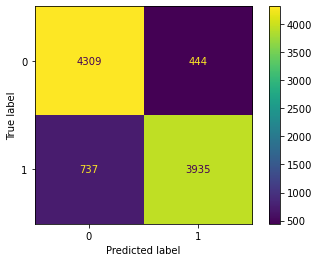

In [102]:
y_pred = logistic_RandomGrid.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print("ROC OF THE MODEL: ",roc_auc_score(y_test, logistic_RandomGrid.predict_proba(X_test)[:, 1]))
print()
print(classification_report(y_test, y_pred))

plot_confusion_matrix(logistic_RandomGrid, X_test, y_test)

# handling test data

In [103]:
test=pd.read_csv(r"D:\Robi Datathon\test.csv")
test.head()

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...,M,Y,Y,1,B,D,D,0,l,...,0.026301,-9.200175,2.122970,6.646617,4.801224,1.693087,0,0,0.439270,2
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...,M,Y,Y,1,B,C,B,1,l,...,0.010774,-8.897092,1.770889,11.046294,6.407230,1.516728,0,0,0.084334,4
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...,M,Y,N,1,B,D,B,1,l,...,0.016837,-9.173660,1.871872,2.805834,5.481219,1.788823,0,0,0.984210,0
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...,M,Y,Y,1,D,D,B,0,1,...,0.015684,-9.178200,1.675028,6.354938,5.427266,1.792147,0,0,0.003492,1
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...,M,Y,Y,1,D,C,B,1,1,...,0.006406,-8.726633,1.963535,6.810158,11.487845,1.880992,0,0,0.060614,0


<AxesSubplot:>

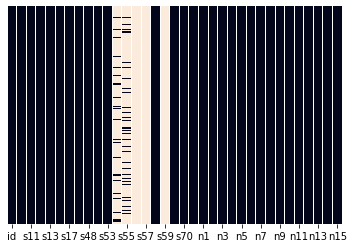

In [104]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [105]:
def drop_null_test(*xs):
    for x in xs: 
        if x in test.columns:
            print("No of null value in" ,x,':', sum(test[x].isnull()))
            test.drop([x],axis=1,inplace=True)
    

In [106]:
drop_null_test('s54','s53','s55','s56','s57','s59')

No of null value in s54 : 77322
No of null value in s53 : 0
No of null value in s55 : 75644
No of null value in s56 : 85065
No of null value in s57 : 85065
No of null value in s59 : 85065


In [107]:
test.isnull().sum() 

id        0
gender    0
s11       0
s12       0
s13       0
s16       0
s17       0
s18       0
s48       0
s52       0
s58       0
s69       0
s70       0
s71       0
n1        0
n2        0
n3        0
n4        0
n5        0
n6        0
n7        0
n8        0
n9        0
n10       0
n11       0
n12       0
n13       0
n14       0
n15       0
dtype: int64

In [108]:
################     Hnadling Categorical value in test data

In [109]:
def one_hot_encoding_test(*columns):
    global test
    for x in columns: 
        if x in test.columns:
            one_hot= pd.get_dummies(test[x], prefix=x)
            test=test.join(one_hot)
            test.drop([x], axis=1,inplace=True)

In [110]:
one_hot_encoding_test('gender','s11','s12','s16','s17','s18','s52','s58','s69','s70','s71')

In [111]:
test_new=test.copy() 

In [115]:
test_features=test_new.drop(['id'],axis=1)

In [116]:
test_features

,s13,s48,n1,n2,n3,n4,n5,n6,n7,n8,...,s69_x,s69_~1,s70_op: A,s70_op: B,s70_op: C,s70_op: D,s71_a,s71_b,s71_c,s71_d
0,1,0,17.362752,2.985283,3,2.052415,-32.339904,0.026301,-9.200175,2.122970,...,0,1,0,0,0,1,0,0,0,1
1,1,1,15.892228,2.389056,7,6.928142,-32.356092,0.010774,-8.897092,1.770889,...,0,1,0,0,1,0,0,1,0,0
2,1,1,10.893303,1.470903,6,2.210629,-32.397871,0.016837,-9.173660,1.871872,...,0,1,0,0,0,1,0,1,0,0
3,1,0,9.876850,1.442493,3,2.350379,-32.836003,0.015684,-9.178200,1.675028,...,1,0,0,0,0,1,0,1,0,0
4,1,1,11.674406,2.544719,8,8.136887,-32.577495,0.006406,-8.726633,1.963535,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85060,1,1,10.547381,1.452660,7,8.000085,-32.578221,0.011017,-8.994304,1.581816,...,0,0,0,0,1,0,0,0,1,0
85061,1,1,10.149117,2.168239,6,6.011115,-32.447282,0.019550,-9.131275,1.526110,...,0,1,0,0,1,0,0,0,1,0
85062,1,1,3.744380,0.661328,2,2.112016,-32.351165,0.015461,-9.249529,1.505547,...,1,0,1,0,0,0,0,0,1,0
85063,1,1,10.194615,1.557863,2,2.433086,-32.363871,0.010612,-9.229158,1.833286,...,0,1,0,0,0,1,0,0,0,1


In [120]:
y_pred_xg= random_search.predict(test_features)

In [123]:
y_pred_rf=rf_RandomGrid.predict(test_features)

In [119]:
y_pred_lg=logistic_RandomGrid.predict(test_features)

In [121]:
y_pred_xg

array([1, 1, 1, ..., 0, 1, 0])

In [124]:
y_pred_rf

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [125]:
y_pred_lg

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [126]:
test['label_xg']=y_pred_xg

In [127]:
test['label_rf']=y_pred_rf

In [128]:
test['label_lg']=y_pred_lg

In [131]:
test['check']=test['label_xg']+test['label_rf']+test['label_lg']

In [133]:
test['label']=test['check'].apply(lambda x: 0 if x <2 else 1)

In [134]:
submission=(test[['id','label_xg','label_rf','label_lg','check','label']])
submission

,id,label_xg,label_rf,label_lg,check,label
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...,1,1,1,3,1
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...,1,0,1,2,1
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...,1,1,1,3,1
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...,0,0,0,0,0
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...,0,0,0,0,0
...,...,...,...,...,...,...
85060,b'gAAAAABinOjbnJVk2-nOVQsYB9p4DK26fTLLik_UR2H0...,0,1,0,1,0
85061,b'gAAAAABinOi7ixyXrlKYlx8D9i0-TIPD5elP2k-vuekn...,1,1,1,3,1
85062,b'gAAAAABinOi31zWSlD0OMhbBd3_weh7Kq6aPeO4yYqns...,0,0,0,0,0
85063,b'gAAAAABinOjIe7jFVk9k7jiH8Y3rdpUHDTZG2T2isunp...,1,1,1,3,1


In [153]:
test.drop(['label'],axis=1,inplace=True)

In [139]:
submission=(test[['id','label_rf']])
submission

,id,label_rf
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...,1
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...,0
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...,1
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...,0
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...,0
...,...,...
85060,b'gAAAAABinOjbnJVk2-nOVQsYB9p4DK26fTLLik_UR2H0...,1
85061,b'gAAAAABinOi7ixyXrlKYlx8D9i0-TIPD5elP2k-vuekn...,1
85062,b'gAAAAABinOi31zWSlD0OMhbBd3_weh7Kq6aPeO4yYqns...,0
85063,b'gAAAAABinOjIe7jFVk9k7jiH8Y3rdpUHDTZG2T2isunp...,1


In [140]:
submission

,id,label_rf
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...,1
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...,0
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...,1
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...,0
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...,0
...,...,...
85060,b'gAAAAABinOjbnJVk2-nOVQsYB9p4DK26fTLLik_UR2H0...,1
85061,b'gAAAAABinOi7ixyXrlKYlx8D9i0-TIPD5elP2k-vuekn...,1
85062,b'gAAAAABinOi31zWSlD0OMhbBd3_weh7Kq6aPeO4yYqns...,0
85063,b'gAAAAABinOjIe7jFVk9k7jiH8Y3rdpUHDTZG2T2isunp...,1


In [144]:
test.rename(columns = {'label_rf':'label'}, inplace = True)

In [137]:
submission.to_csv('submission_hybrid.csv',index=False)

In [147]:
test

,id,s13,s48,n1,n2,n3,n4,n5,n6,n7,...,s70_op: B,s70_op: C,s70_op: D,s71_a,s71_b,s71_c,s71_d,label_xg,label_lg,check
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...,1,0,17.362752,2.985283,3,2.052415,-32.339904,0.026301,-9.200175,...,0,0,1,0,0,0,1,1,1,3
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...,1,1,15.892228,2.389056,7,6.928142,-32.356092,0.010774,-8.897092,...,0,1,0,0,1,0,0,1,1,2
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...,1,1,10.893303,1.470903,6,2.210629,-32.397871,0.016837,-9.173660,...,0,0,1,0,1,0,0,1,1,3
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...,1,0,9.876850,1.442493,3,2.350379,-32.836003,0.015684,-9.178200,...,0,0,1,0,1,0,0,0,0,0
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...,1,1,11.674406,2.544719,8,8.136887,-32.577495,0.006406,-8.726633,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85060,b'gAAAAABinOjbnJVk2-nOVQsYB9p4DK26fTLLik_UR2H0...,1,1,10.547381,1.452660,7,8.000085,-32.578221,0.011017,-8.994304,...,0,1,0,0,0,1,0,0,0,1
85061,b'gAAAAABinOi7ixyXrlKYlx8D9i0-TIPD5elP2k-vuekn...,1,1,10.149117,2.168239,6,6.011115,-32.447282,0.019550,-9.131275,...,0,1,0,0,0,1,0,1,1,3
85062,b'gAAAAABinOi31zWSlD0OMhbBd3_weh7Kq6aPeO4yYqns...,1,1,3.744380,0.661328,2,2.112016,-32.351165,0.015461,-9.249529,...,0,0,0,0,0,1,0,0,0,0
85063,b'gAAAAABinOjIe7jFVk9k7jiH8Y3rdpUHDTZG2T2isunp...,1,1,10.194615,1.557863,2,2.433086,-32.363871,0.010612,-9.229158,...,0,0,1,0,0,0,1,1,1,3


In [154]:
test['label']=y_pred_xg

In [155]:
test

,id,s13,s48,n1,n2,n3,n4,n5,n6,n7,...,s70_op: C,s70_op: D,s71_a,s71_b,s71_c,s71_d,label_xg,label_lg,check,label
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...,1,0,17.362752,2.985283,3,2.052415,-32.339904,0.026301,-9.200175,...,0,1,0,0,0,1,1,1,3,1
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...,1,1,15.892228,2.389056,7,6.928142,-32.356092,0.010774,-8.897092,...,1,0,0,1,0,0,1,1,2,1
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...,1,1,10.893303,1.470903,6,2.210629,-32.397871,0.016837,-9.173660,...,0,1,0,1,0,0,1,1,3,1
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...,1,0,9.876850,1.442493,3,2.350379,-32.836003,0.015684,-9.178200,...,0,1,0,1,0,0,0,0,0,0
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...,1,1,11.674406,2.544719,8,8.136887,-32.577495,0.006406,-8.726633,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85060,b'gAAAAABinOjbnJVk2-nOVQsYB9p4DK26fTLLik_UR2H0...,1,1,10.547381,1.452660,7,8.000085,-32.578221,0.011017,-8.994304,...,1,0,0,0,1,0,0,0,1,0
85061,b'gAAAAABinOi7ixyXrlKYlx8D9i0-TIPD5elP2k-vuekn...,1,1,10.149117,2.168239,6,6.011115,-32.447282,0.019550,-9.131275,...,1,0,0,0,1,0,1,1,3,1
85062,b'gAAAAABinOi31zWSlD0OMhbBd3_weh7Kq6aPeO4yYqns...,1,1,3.744380,0.661328,2,2.112016,-32.351165,0.015461,-9.249529,...,0,0,0,0,1,0,0,0,0,0
85063,b'gAAAAABinOjIe7jFVk9k7jiH8Y3rdpUHDTZG2T2isunp...,1,1,10.194615,1.557863,2,2.433086,-32.363871,0.010612,-9.229158,...,0,1,0,0,0,1,1,1,3,1


In [156]:
new = test[['id','label']].copy()

In [157]:
new

,id,label
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...,1
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...,1
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...,1
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...,0
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...,0
...,...,...
85060,b'gAAAAABinOjbnJVk2-nOVQsYB9p4DK26fTLLik_UR2H0...,0
85061,b'gAAAAABinOi7ixyXrlKYlx8D9i0-TIPD5elP2k-vuekn...,1
85062,b'gAAAAABinOi31zWSlD0OMhbBd3_weh7Kq6aPeO4yYqns...,0
85063,b'gAAAAABinOjIe7jFVk9k7jiH8Y3rdpUHDTZG2T2isunp...,1


In [158]:
new.to_csv('Submission_Thelazypandas_6h37hp.csv',index=False)